<a href="https://colab.research.google.com/github/Alan-Hans/Challenge-Data-Scientist/blob/developement/solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This challenge requires to predict the probability of delay of flights at Santiago de Chile Airport (SCL) using a provided dataset. This work was developed by Alan Hans Bitterlich Koning, email: Alan.bitterlich.k@gmail.com. The index of this notebook is the following: 
```
1.- Import data 
2.- EDA
3.- Models
4.- Results
5.- Comments


#1.- Import data

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/Alan-Hans/Challenge-Data-Scientist/main/dataset_SCL.csv'

df = pd.read_csv(url)

<ipython-input-2-b0cb3f0119c9>:9: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [3]:
df

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68201,2017-12-22 14:55:00,400,SCEL,SPJC,JAT,2017-12-22 15:41:00,400.0,SCEL,SPJC,JAT,22,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima
68202,2017-12-25 14:55:00,400,SCEL,SPJC,JAT,2017-12-25 15:11:00,400.0,SCEL,SPJC,JAT,25,12,2017,Lunes,I,JetSmart SPA,Santiago,Lima
68203,2017-12-27 14:55:00,400,SCEL,SPJC,JAT,2017-12-27 15:35:00,400.0,SCEL,SPJC,JAT,27,12,2017,Miercoles,I,JetSmart SPA,Santiago,Lima
68204,2017-12-29 14:55:00,400,SCEL,SPJC,JAT,2017-12-29 15:08:00,400.0,SCEL,SPJC,JAT,29,12,2017,Viernes,I,JetSmart SPA,Santiago,Lima


Description of every column
```
Fecha-I: Scheduled date and time of departure (local time) in format "YYYY-MM-DD hh:mm:ss" (year-month-day hour:minute:second).
Vlo-I: Scheduled flight number (text)
Ori-I: Origin city code (text)
Des-I: destination city code. (text)
Emp-I: Scheduled airline code (text)
Fecha-O: Date and time of arrival (local time) in format "YYYY-MM-DD hh:mm:ss" (year-month-day hour:minute:second).
Vlo-O: Flight operation number of the flight (text)
Ori-O: Operation origin city code (text)
Des-O: Operation destination city code (text)
Emp-O: Airline code of the operated flight (text)
DIA: Day of the month (numeric)
MES: Month of the year (numeric)
AÑO: Year (numeric)
DIANOM: Day of the week (text)
TIPOVUELO: Type of flight, I =International, N =National (text)
OPERA: Operating airline company (text)
SIGLAORI: Name city of origin (text)
SIGLADES: Destination city name (text)'



#2.- EDA

 
#Some interesting insights from this analysis: 

*   It shows that the largest number of flights in this data correspond to Grupo LATAM airlines with about 58%.
*   The Top 5 destinations are: Buenos Aires,     Antofagasta,   Lima,             
Calama and           Puerto Montt.
*   Most flights are made during the month of December and on Fridays.


 


In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print the first few rows of the dataset to get a sense of its structure
print(df.head())

# Check the shape of the dataset
print(df.shape)

# Check for missing values
print(df.isnull().sum())

# Descriptive statistics
print(df.describe())

# List of columns
print(df.info())

               Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O Vlo-O  \
0  2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   226   
1  2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   226   
2  2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   226   
3  2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   226   
4  2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   226   

  Ori-O Des-O Emp-O  DIA  MES   AÑO     DIANOM TIPOVUELO              OPERA  \
0  SCEL  KMIA   AAL    1    1  2017    Domingo         I  American Airlines   
1  SCEL  KMIA   AAL    2    1  2017      Lunes         I  American Airlines   
2  SCEL  KMIA   AAL    3    1  2017     Martes         I  American Airlines   
3  SCEL  KMIA   AAL    4    1  2017  Miercoles         I  American Airlines   
4  SCEL  KMIA   AAL    5    1  2017     Jueves         I  American Airlines   

   SIGLAORI SIGLADES  
0  Santiago    Miami  
1  Santiago    M

In [5]:
## For the purpose of this analysis, null results will be filtered out, which apparently corresponds to only 1, so it will not have a great impact.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68205 non-null  object
 1   Vlo-I      68205 non-null  object
 2   Ori-I      68205 non-null  object
 3   Des-I      68205 non-null  object
 4   Emp-I      68205 non-null  object
 5   Fecha-O    68205 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68205 non-null  object
 8   Des-O      68205 non-null  object
 9   Emp-O      68205 non-null  object
 10  DIA        68205 non-null  int64 
 11  MES        68205 non-null  int64 
 12  AÑO        68205 non-null  int64 
 13  DIANOM     68205 non-null  object
 14  TIPOVUELO  68205 non-null  object
 15  OPERA      68205 non-null  object
 16  SIGLAORI   68205 non-null  object
 17  SIGLADES   68205 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.9+ MB


In [6]:
for i in df.columns:
    print(i)
    print('Unique Values: '+str(len(df.groupby([i]).count())))
    print(df[i].value_counts())

Fecha-I
Unique Values: 53252
2017-07-28 13:30:00    6
2017-03-19 18:00:00    6
2017-03-26 18:00:00    6
2017-12-16 13:35:00    5
2017-02-15 13:35:00    5
                      ..
2017-06-01 15:16:00    1
2017-06-02 15:16:00    1
2017-06-03 15:16:00    1
2017-06-04 15:16:00    1
2017-12-31 14:55:00    1
Name: Fecha-I, Length: 53252, dtype: int64
Vlo-I
Unique Values: 750
174     686
11      645
116     608
150     557
162     553
       ... 
1158      1
368       1
9955      1
9701      1
1218      1
Name: Vlo-I, Length: 750, dtype: int64
Ori-I
Unique Values: 1
SCEL    68205
Name: Ori-I, dtype: int64
Des-I
Unique Values: 64
SCFA    5787
SPJC    5269
SCCF    5145
SCTE    4357
SCIE    3995
        ... 
SBFI       1
SPSO       1
SEQU       1
SEQM       1
SARI       1
Name: Des-I, Length: 64, dtype: int64
Emp-I
Unique Values: 30
LAN    37611
SKU    14298
TAM     3049
ARG     1949
CMP     1850
LAW     1573
AVA     1152
JAT     1095
GLO      806
AAL      757
ACA      565
IBE      362
AFR      

In [7]:
# Create a new categorical column based on Column1
df['TIPOVUELO_C'] = df['TIPOVUELO'].apply(lambda x: 1 if x == 'I' else 0)

# Print the updated dataframe
print(df.info())

<ipython-input-7-12f1c2973138>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TIPOVUELO_C'] = df['TIPOVUELO'].apply(lambda x: 1 if x == 'I' else 0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 68205 entries, 0 to 68205
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Fecha-I      68205 non-null  object
 1   Vlo-I        68205 non-null  object
 2   Ori-I        68205 non-null  object
 3   Des-I        68205 non-null  object
 4   Emp-I        68205 non-null  object
 5   Fecha-O      68205 non-null  object
 6   Vlo-O        68205 non-null  object
 7   Ori-O        68205 non-null  object
 8   Des-O        68205 non-null  object
 9   Emp-O        68205 non-null  object
 10  DIA          68205 non-null  int64 
 11  MES          68205 non-null  int64 
 12  AÑO          68205 non-null  int64 
 13  DIANOM       68205 non-null  object
 14  TIPOVUELO    68205 non-null  object
 15  OPERA        68205 non-null  object
 16  SIGLAORI     68205 non-null  object
 17  SIGLADES     68205 non-null  object
 18  TIPOVUELO_C  68205 non-null  int64 
dtypes: int64(4), object(15)
m

#Creation of feature variables

In [8]:
import pandas as pd

# Assuming your date column is called "Date-I"
# Create a datetime object from the "Date-I" column
df['Date-I'] = pd.to_datetime(df['Fecha-I'], format="%Y-%m-%d %H:%M:%S")

# Define the high season periods
high_season_periods = [
    (pd.to_datetime('12-15-2017', format="%m-%d-%Y").date(), pd.to_datetime('03-03-2018', format="%m-%d-%Y").date()),
    (pd.to_datetime('07-15-2017', format="%m-%d-%Y").date(), pd.to_datetime('07-31-2017', format="%m-%d-%Y").date()),
    (pd.to_datetime('09-11-2017', format="%m-%d-%Y").date(), pd.to_datetime('09-30-2017', format="%m-%d-%Y").date())
]

# Define a function to check if a date is in a high season period
def is_in_high_season(date):
    for period in high_season_periods:
        if period[0] <= date.date() <= period[1]:
            return 1
    return 0

# Apply the function to create the "high_season" column
df['high_season'] = df['Date-I'].apply(is_in_high_season)

<ipython-input-8-97f84f9c2479>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date-I'] = pd.to_datetime(df['Fecha-I'], format="%Y-%m-%d %H:%M:%S")
<ipython-input-8-97f84f9c2479>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_season'] = df['Date-I'].apply(is_in_high_season)


In [9]:
import pandas as pd

# Convert date columns to datetime format
df['Date-I'] = pd.to_datetime(df['Fecha-I'])
df['Date-O'] = pd.to_datetime(df['Fecha-O'])

# Handle negative values in min_diff column
df['min_diff'] = df.apply(lambda row: (row['Date-O'] - row['Date-I']).total_seconds() / 60 if row['Date-O'] > row['Date-I'] else 0, axis=1)

# Add period_day column based on Date-I
df['period_day'] = df['Date-I'].apply(lambda x: 'morning' if 5 <= x.hour < 12 else ('afternoon' if 12 <= x.hour < 19 else 'night'))

# Create a function to set delay_15 column based on min_diff
def set_delay_15(x):
    if x > 15:
        return 1
    else:
        return 0

# Apply the set_delay_15 function to create delay_15 column
df['delay_15'] = df['min_diff'].apply(set_delay_15)

# Print the updated dataframe
print(df)

<ipython-input-9-7d2521532e5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date-I'] = pd.to_datetime(df['Fecha-I'])
<ipython-input-9-7d2521532e5d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date-O'] = pd.to_datetime(df['Fecha-O'])
<ipython-input-9-7d2521532e5d>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

                   Fecha-I Vlo-I Ori-I Des-I Emp-I              Fecha-O  \
0      2017-01-01 23:30:00   226  SCEL  KMIA   AAL  2017-01-01 23:33:00   
1      2017-01-02 23:30:00   226  SCEL  KMIA   AAL  2017-01-02 23:39:00   
2      2017-01-03 23:30:00   226  SCEL  KMIA   AAL  2017-01-03 23:39:00   
3      2017-01-04 23:30:00   226  SCEL  KMIA   AAL  2017-01-04 23:33:00   
4      2017-01-05 23:30:00   226  SCEL  KMIA   AAL  2017-01-05 23:28:00   
...                    ...   ...   ...   ...   ...                  ...   
68201  2017-12-22 14:55:00   400  SCEL  SPJC   JAT  2017-12-22 15:41:00   
68202  2017-12-25 14:55:00   400  SCEL  SPJC   JAT  2017-12-25 15:11:00   
68203  2017-12-27 14:55:00   400  SCEL  SPJC   JAT  2017-12-27 15:35:00   
68204  2017-12-29 14:55:00   400  SCEL  SPJC   JAT  2017-12-29 15:08:00   
68205  2017-12-31 14:55:00   400  SCEL  SPJC   JAT  2017-12-31 15:04:00   

       Vlo-O Ori-O Des-O Emp-O  ...              OPERA  SIGLAORI  SIGLADES  \
0        226  SCEL  K

#Graph analisis and ratios

In [11]:
# Ratio between High season and delay
count = df[(df['delay_15'] == 1) & (df['high_season'] == 1)].shape[0]
count_2 = df[(df['high_season'] == 1)].shape[0]
ratio = count / count_2
count_3 = df[(df['delay_15'] == 1) & (df['high_season'] == 0)].shape[0]
count_4 = df[(df['high_season'] == 0)].shape[0]
ratio_2 = count_3 / count_4

print ('Ratio referring to high season and delay:' )
print (ratio)

print ('Ratio referring to low season and delay:' )
print (ratio_2)



Ratio referring to high season and delay:
0.24372384937238495
Ratio referring to low season and delay:
0.17422732236648233


In [13]:
# Ratio between High season and delay
count = df[(df['delay_15'] == 1) & (df['period_day'] == 'night')].shape[0]
count_2 = df[(df['period_day'] == 'night')].shape[0]
ratio = count / count_2

count_3 = df[(df['delay_15'] == 1) & (df['period_day'] == 'afternoon')].shape[0]
count_4 = df[(df['period_day'] == 'afternoon')].shape[0]
ratio_2 = count_3 / count_4

count_5 = df[(df['delay_15'] == 1) & (df['period_day'] == 'morning')].shape[0]
count_6 = df[(df['period_day'] == 'morning')].shape[0]
ratio_3 = count_5 / count_6

print ('Ratio referring to period day night delay:' )
print (ratio)

print ('Ratio referring to period day afternoon delay:' )
print (ratio_2)

print ('Ratio referring to period day morning delay:' )
print (ratio_3)

Ratio referring to period day night delay:
0.20002305741295826
Ratio referring to period day afternoon delay:
0.19940406178938289
Ratio referring to period day morning delay:
0.16007258096327562


In [54]:
period_day = df.groupby('delay_15')['period_day'].value_counts()
TIPOVUELO = df.groupby('delay_15')['TIPOVUELO'].value_counts()
SIGLAORI =  df.groupby('delay_15')['SIGLAORI'].value_counts()
SIGLAORI =  df.groupby('delay_15')['SIGLAORI'].value_counts()
SIGLADES =  df.groupby('delay_15')['SIGLADES'].value_counts()
SIGLADES =  df.groupby('delay_15')['SIGLADES'].value_counts()
OPERA =  df.groupby('delay_15')['OPERA'].value_counts()
high_season =  df.groupby('delay_15')['high_season'].value_counts()
MES = df.groupby('delay_15')['MES'].value_counts()
DIA = df.groupby('delay_15')['DIA'].value_counts()
AÑO = df.groupby('delay_15')['AÑO'].value_counts()
DIANOM = df.groupby('delay_15')['DIANOM'].value_counts()

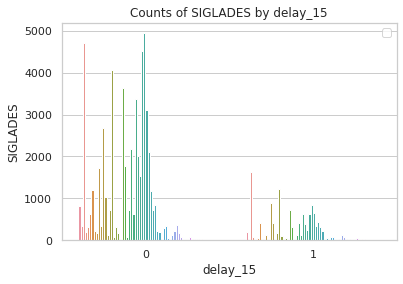

In [15]:
sns.countplot(x='delay_15', hue='SIGLADES', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('SIGLADES')
plt.title('Counts of SIGLADES by delay_15')
plt.legend(labels=[])
plt.show()

There are specific cities that have an influence on the delay.

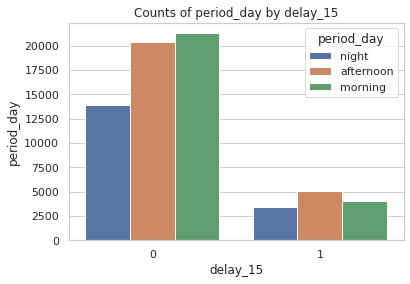

In [16]:
sns.countplot(x='delay_15', hue='period_day', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('period_day')
plt.title('Counts of period_day by delay_15')
plt.show()

Delays usually occur in the afternoon or nights with the follow ratio Ratio Referring to period day night delay:
0.20002305741295826
Ratio referring to period day afternoon delay:
0.19940406178938289
Ratio referring to period day morning delay:
0.16007258096327562

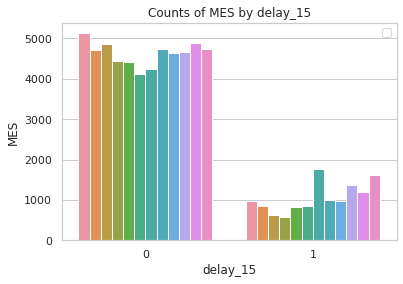

In [23]:
sns.countplot(x='delay_15', hue='MES', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('MES')
plt.title('Counts of MES by delay_15')
plt.legend(labels=[])
plt.show()

Depending on the month, it does provide information regarding the delay and it can be assimilated as that in holidays dates (December or July) there are considerable delays.

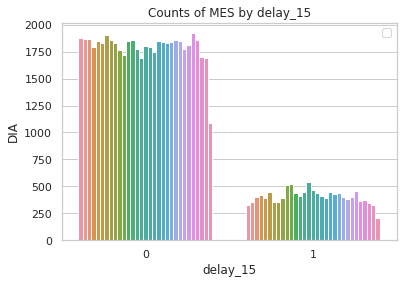

In [18]:
sns.countplot(x='delay_15', hue='DIA', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('DIA')
plt.title('Counts of MES by delay_15')
plt.legend(labels=[])
plt.show()

Depending on the day, it does not provide much information and there is an uniform distribution.

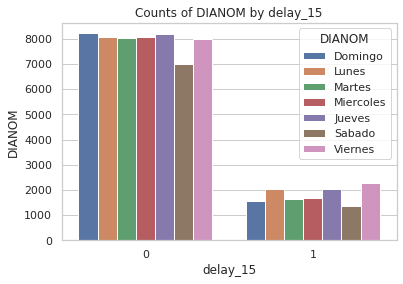

In [21]:
sns.countplot(x='delay_15', hue='DIANOM', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('DIANOM')
plt.title('Counts of DIANOM by delay_15')
plt.show()

It is interesting the afluent on saturday is lower than the rest of the days and in sunday looks like there is better chances to have a delay.

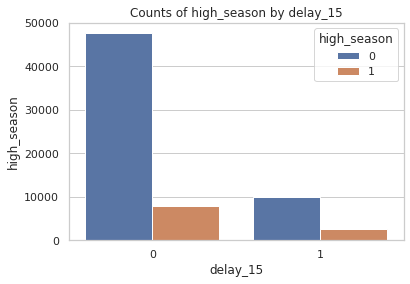

In [55]:
sns.countplot(x='delay_15', hue='high_season', data=df)

# set axis labels and title
plt.xlabel('delay_15')
plt.ylabel('high_season')
plt.title('Counts of high_season by delay_15')
plt.show()

Ratio referring to high season (1) and delay:
0.24372384937238495
Ratio referring to low season (0) and delay:
0.17422732236648233

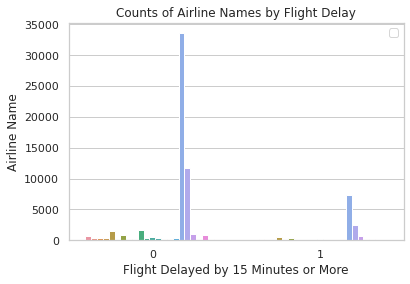

In [53]:
sns.countplot(x='delay_15', hue='OPERA', data=df)

# set axis labels and title
plt.xlabel('Flight Delayed by 15 Minutes or More')
plt.ylabel('Airline Name')
plt.title('Counts of Airline Names by Flight Delay')

# adjust the x-axis
plt.xticks(range(len(df['delay_15'].unique())), df['delay_15'].unique())
plt.legend(labels=[])


plt.show() 

Not much information on other flights mostly representing latam and sky airline.

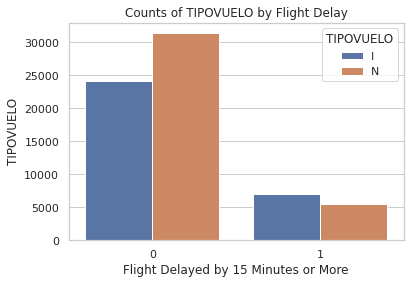

In [64]:
sns.countplot(x='delay_15', hue='TIPOVUELO', data=df)

# set axis labels and title
plt.xlabel('Flight Delayed by 15 Minutes or More')
plt.ylabel('TIPOVUELO')
plt.title('Counts of TIPOVUELO by Flight Delay')

# adjust the x-axis
plt.xticks(range(len(df['delay_15'].unique())), df['delay_15'].unique())



plt.show() 

International flights are more prone to delays. But nothing conclusive.

#3.- Predictive model